In [1]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
check = 'ABEHJLMNRUWXY'
with open("ids.txt", "r") as fp:
    dataset = fp.readlines()
dataset = list(filter(lambda x: x[-1] in check, map(lambda x: x.strip(), dataset)))
dataset = list(set(dataset))
len(dataset)

1200

In [3]:
sample = []
for char in check:
    for j in dataset:
        if char in j:
            sample.append(j)
            break
print(sample)

['191403A', '202809B', '191843E', '202736H', '203091J', '202628L', '191253M', '191662N', '192010R', '202995U', '202674W', '202476X', '191634Y']


In [4]:
def checksum(number, weights):
    return sum(int(digit) * weight for digit, weight in zip(number[:-1], weights)) % 13

In [5]:
valid = []
for combo in itertools.product(range(0, 13), repeat=6):
        weights = [*combo]
        mapping = {checksum(data, weights): data[-1] for data in sample}
        if len(mapping) != 13: continue
        if all(mapping.get(checksum(data, weights), '') == data[-1] for data in dataset[:500]):
            print(weights, mapping)
            valid.append((weights, mapping))

[0, 1, 3, 1, 2, 7] {11: 'A', 12: 'B', 10: 'E', 9: 'H', 8: 'J', 7: 'L', 6: 'M', 5: 'N', 4: 'R', 3: 'U', 2: 'W', 1: 'X', 0: 'Y'}
[0, 2, 6, 2, 4, 1] {9: 'A', 11: 'B', 7: 'E', 5: 'H', 3: 'J', 1: 'L', 12: 'M', 10: 'N', 8: 'R', 6: 'U', 4: 'W', 2: 'X', 0: 'Y'}
[0, 3, 9, 3, 6, 8] {7: 'A', 10: 'B', 4: 'E', 1: 'H', 11: 'J', 8: 'L', 5: 'M', 2: 'N', 12: 'R', 9: 'U', 6: 'W', 3: 'X', 0: 'Y'}
[0, 4, 12, 4, 8, 2] {5: 'A', 9: 'B', 1: 'E', 10: 'H', 6: 'J', 2: 'L', 11: 'M', 7: 'N', 3: 'R', 12: 'U', 8: 'W', 4: 'X', 0: 'Y'}
[0, 5, 2, 5, 10, 9] {3: 'A', 8: 'B', 11: 'E', 6: 'H', 1: 'J', 9: 'L', 4: 'M', 12: 'N', 7: 'R', 2: 'U', 10: 'W', 5: 'X', 0: 'Y'}
[0, 6, 5, 6, 12, 3] {1: 'A', 7: 'B', 8: 'E', 2: 'H', 9: 'J', 3: 'L', 10: 'M', 4: 'N', 11: 'R', 5: 'U', 12: 'W', 6: 'X', 0: 'Y'}
[0, 7, 8, 7, 1, 10] {12: 'A', 6: 'B', 5: 'E', 11: 'H', 4: 'J', 10: 'L', 3: 'M', 9: 'N', 2: 'R', 8: 'U', 1: 'W', 7: 'X', 0: 'Y'}
[0, 8, 11, 8, 3, 4] {10: 'A', 5: 'B', 2: 'E', 7: 'H', 12: 'J', 4: 'L', 9: 'M', 1: 'N', 6: 'R', 11: 'U', 3: 

In [6]:
len(valid)

12

In [7]:
mapping = {11: 'A', 12: 'B', 10: 'E', 9: 'H', 8: 'J', 7: 'L', 6: 'M', 5: 'N', 4: 'R', 3: 'U', 2: 'W', 1: 'X', 0: 'Y'}
weights = [0, 1, 3, 1, 2, 7]

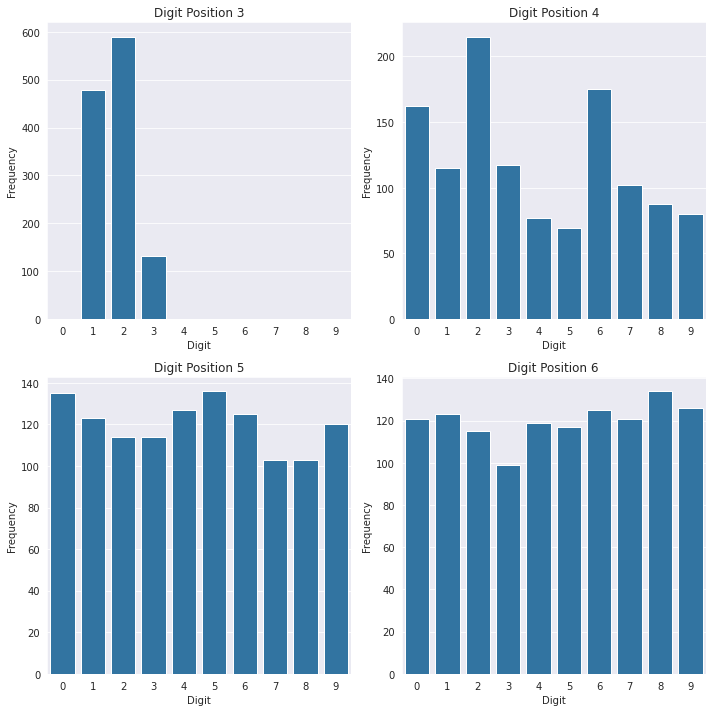

In [8]:
numbers = [entry[2:-1] for entry in dataset]
digit_counts = [Counter() for _ in range(len(numbers[0]))]

for number in numbers:
    for idx, digit in enumerate(number):
        digit_counts[idx][digit] += 1

digit_frequency = np.zeros((len(numbers[0]), 10))
for idx, counter in enumerate(digit_counts):
    for digit, count in counter.items():
        digit_frequency[idx, int(digit)] = count

plt.figure(figsize=(10, 10))
for i in range(len(numbers[0])):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=np.arange(10), y=digit_frequency[i])
    plt.title(f"Digit Position {i + 3}")
    plt.xlabel("Digit")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()